In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [17]:
stops = pd.read_csv('dados/stops.txt')
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53463 entries, 0 to 53462
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_id         53463 non-null  object 
 1   stop_code       0 non-null      float64
 2   stop_name       53463 non-null  object 
 3   stop_desc       0 non-null      float64
 4   stop_lat        53463 non-null  float64
 5   stop_lon        53463 non-null  float64
 6   stop_url        0 non-null      float64
 7   location_type   46444 non-null  float64
 8   parent_station  0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 3.7+ MB


In [18]:
id1_stop_lat = stops

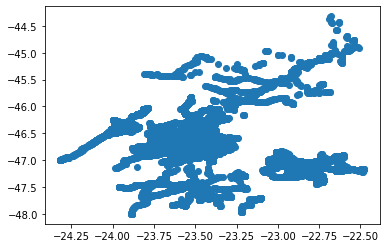

In [19]:
plt.scatter(id1_stop_lat.stop_lat, id1_stop_lat.stop_lon)

In [20]:
res = stops[:2]

In [21]:

rotas = pd.read_csv('dados/routes.txt')
rotas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   route_id          1280 non-null   object 
 1   agency_id         1280 non-null   object 
 2   route_short_name  1280 non-null   object 
 3   route_long_name   1280 non-null   object 
 4   route_desc        0 non-null      float64
 5   route_type        1280 non-null   int64  
 6   route_color       1280 non-null   object 
 7   route_text_color  1271 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 80.1+ KB


In [22]:
rota1 = rotas[:1]
rota1

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color
0,733ca29f-5e68-4d19-913d-2d9adf975912,9b0f9c54-95d2-4b66-a586-274ea116e64f,1709-21,Jd. Joamar - Metrô Tucuruvi,NaN,3,002F6C,FFFFFF


In [23]:
trips = pd.read_csv('dados/trips.txt')
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   route_id       4869 non-null   object
 1   service_id     4869 non-null   object
 2   trip_id        4869 non-null   object
 3   trip_headsign  4844 non-null   object
 4   direction_id   4869 non-null   int64 
 5   shape_id       4869 non-null   object
dtypes: int64(1), object(5)
memory usage: 228.4+ KB


In [24]:
trip = trips[:1]
trip

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,e3e24018-562b-47c5-bf0c-e794a65bf0f6,1-USD,af90fc25-c5e3-4a13-93f8-ab9d0611c5da_USD,Div. De Ferraz,1,af90fc25-c5e3-4a13-93f8-ab9d0611c5da


In [25]:
import math
d2r = 0.017453292519943295769236
dlong = (-46.410291 - (-46.416247)) * d2r
dlat = (-23.543302 - (-23.541756)) * d2r
temp_sin = math.sin(dlat/2.0);
temp_cos = math.cos(-23.541756 * d2r)
temp_sin2 = math.sin(dlong/2.0)

a = (temp_sin * temp_sin) + (temp_cos * temp_cos) * (temp_sin2 * temp_sin2)
c = 2.0 * math.atan2(math.sqrt(a), math.sqrt(1.0 - a))

result = 6368.1 * c
result

0.6307353712501135

In [26]:
def removerCincoMetro(latInicial,longInicial, latFinal,longFinal):
    d2r = 0.017453292519943295769236
    dlong = (longFinal - longInicial) * d2r
    dlat = (latFinal - latInicial) * d2r
    temp_sin = math.sin(dlat / 2.0);
    temp_cos = math.cos(latInicial * d2r)
    temp_sin2 = math.sin(dlong / 2.0)

    a = (temp_sin * temp_sin) + (temp_cos * temp_cos) * (temp_sin2 * temp_sin2)
    c = 2.0 * math.atan2(math.sqrt(a), math.sqrt(1.0 - a))

    return (6368.1 * c) < 0.005

count = 0 # número de pontos dentro de 5 metros

size = stops.count()
size

stop_id           53463
stop_code             0
stop_name         53463
stop_desc             0
stop_lat          53463
stop_lon          53463
stop_url              0
location_type     46444
parent_station        0
dtype: int64

In [27]:
adj = ["red", "big", "tasty"]

for x in adj:
  for y in adj:
    print(x, y)

red red
red big
red tasty
big red
big big
big tasty
tasty red
tasty big
tasty tasty
